## Importando as bibliotecas

In [2899]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, f_oneway, ttest_ind
import scipy.stats as st
import warnings
def ignore_warnings(*args,**kwargs):
    pass
warnings.warn = ignore_warnings
sns.set_theme(style='darkgrid')

## 1) Importando os datasets

In [2900]:
depressao = pd.read_csv('DEMO_PHQ.csv')
habitos = pd.read_csv('PAG_HEI.csv') 

In [2901]:
depressao.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [2902]:
habitos.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


### 1.1) Concatenando os datasets usando SEQN como chave

In [2903]:
df = pd.merge(left=habitos,right=depressao,on='SEQN')
df.shape[:]

(5334, 31)

In [2904]:
print(df.columns)

Index(['SEQN', 'PAG_MINW', 'ADHERENCE', 'HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE', 'DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090',
       'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC'],
      dtype='object')


## 2) Tratamento de Dados

### 2.1) Renomeando as colunas para facilitar nos códigos e na compreensão

In [2905]:
df.rename(columns={'SEQN': 'ID',
                    'PAG_MINW':'mins_exerc',
                    'ADHERENCE':'aderencia',
                    'HEI2015C1_TOTALVEG':'vegetais',
                    'HEI2015C2_GREEN_AND_BEAN':'legumesfeijao',
                    'HEI2015C3_TOTALFRUIT':'frutas_totais',
                    'HEI2015C4_WHOLEFRUIT':'frutas_natura',
                    'HEI2015C5_WHOLEGRAIN':'graos',
                    'HEI2015C6_TOTALDAIRY':'laticinios',
                    'HEI2015C7_TOTPROT':'proteinas',
                    'HEI2015C8_SEAPLANT_PROT':'proteinas_vegetais',
                    'HEI2015C9_FATTYACID':"acido_graxo",
                    'HEI2015C10_SODIUM':'sodio',
                    'HEI2015C11_REFINEDGRAIN':"graos_refinados",
                    'HEI2015C12_SFAT':"gordura_saturada",
                    'HEI2015C13_ADDSUG':"acucares",
                    'HEI2015_TOTAL_SCORE':'hei_score',
                    'RIAGENDR':'genero',
                    'RIDAGEYR':'idade',
                    'RIDRETH1':"raca",
                    'DMDEDUC':'escolaridade',
                    'INDFMINC':'renda'                  
                                        }, inplace=True)

### 2.2) Criando a variável phq9 com a soma dos resultados das perguntas do questionário

In [2906]:
df.iloc[:,-14:-5].head(5)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


In [2907]:
df['phq9'] = df.iloc[:,-14:-5].sum(axis=1)
df

,ID,mins_exerc,aderencia,vegetais,legumesfeijao,frutas_totais,frutas_natura,graos,laticinios,proteinas,proteinas_vegetais,acido_graxo,sodio,graos_refinados,gordura_saturada,acucares,hei_score,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,genero,idade,raca,escolaridade,renda,phq9
0,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.0
1,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0
2,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0
3,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0
4,31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,2.0
5330,41468,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,10.0
5331,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,2.0
5332,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,0.0


### 2.3) Criando a variável phq_grp divindo os valores das respostas em faixas

In [2908]:
#0: Sem sintomas, 1: sintomas leves, 2: sintomas moderados, 3: sintomas moderadamente, 4:sintomas severos
def faixas(df):
    if (df['phq9'] < 5.1):
        val = 0
    elif (df['phq9'] > 5.1) and (df['phq9'] < 10):
        val = 1
    elif (df['phq9'] > 10.1) and (df['phq9'] < 15):
        val = 2
    elif (df['phq9'] > 15.1) and (df['phq9'] < 20):
        val = 3
    else:
        val = 4
    return val

In [2909]:
df['phq_grp'] = df.apply(faixas, axis = 1)
df['phq_grp'].groupby(df['phq_grp']).count()

phq_grp
0    4511
1     495
2     152
3      58
4     118
Name: phq_grp, dtype: int64

### 2.4) Transformando variáveis númericas que na verdade são categóricas

In [2910]:
pd.options.display.max_columns = None

In [2911]:
df.head()

,ID,mins_exerc,aderencia,vegetais,legumesfeijao,frutas_totais,frutas_natura,graos,laticinios,proteinas,proteinas_vegetais,acido_graxo,sodio,graos_refinados,gordura_saturada,acucares,hei_score,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,genero,idade,raca,escolaridade,renda,phq9,phq_grp
0,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.0,0
1,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,0.0,0
2,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,0.0,0
3,31134,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,0.0,0
4,31139,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,4.0,0


In [2912]:
#df.aderencia = df.aderencia.astype('category')
df.genero = df.genero.astype('category')
df.raca = df.raca.astype('category')
#df.escolaridade = df.escolaridade.astype('category')
#df.renda = df.renda.astype('category')
#df.phq_grp = df.phq_grp.astype('category')

In [2913]:
df.dtypes

ID                       int64
mins_exerc             float64
aderencia              float64
vegetais               float64
legumesfeijao          float64
frutas_totais          float64
frutas_natura          float64
graos                  float64
laticinios             float64
proteinas              float64
proteinas_vegetais     float64
acido_graxo            float64
sodio                  float64
graos_refinados        float64
gordura_saturada       float64
acucares               float64
hei_score              float64
DPQ010                 float64
DPQ020                 float64
DPQ030                 float64
DPQ040                 float64
DPQ050                 float64
DPQ060                 float64
DPQ070                 float64
DPQ080                 float64
DPQ090                 float64
genero                category
idade                    int64
raca                  category
escolaridade             int64
renda                  float64
phq9                   float64
phq_grp 

## 3) Análise univariada de todas as variáveis da análise

In [2914]:
#Retirando a coluna ID que não usaremos na análise
df.drop(columns='ID', inplace=True)

In [2915]:
df.shape[:]

(5334, 32)

In [2916]:
#verificando a porcentagem de valores nulos pra cada variável
df.isnull().sum()/len(df)*100

mins_exerc            0.000000
aderencia             0.000000
vegetais              5.136858
legumesfeijao         5.136858
frutas_totais         5.136858
frutas_natura         5.136858
graos                 5.136858
laticinios            5.136858
proteinas             5.136858
proteinas_vegetais    5.136858
acido_graxo           5.136858
sodio                 5.136858
graos_refinados       5.136858
gordura_saturada      5.136858
acucares              5.136858
hei_score             5.136858
DPQ010                9.336333
DPQ020                9.336333
DPQ030                9.336333
DPQ040                9.336333
DPQ050                9.336333
DPQ060                9.336333
DPQ070                9.336333
DPQ080                9.336333
DPQ090                9.336333
genero                0.000000
idade                 0.000000
raca                  0.000000
escolaridade          0.000000
renda                 0.881140
phq9                  0.000000
phq_grp               0.000000
dtype: f

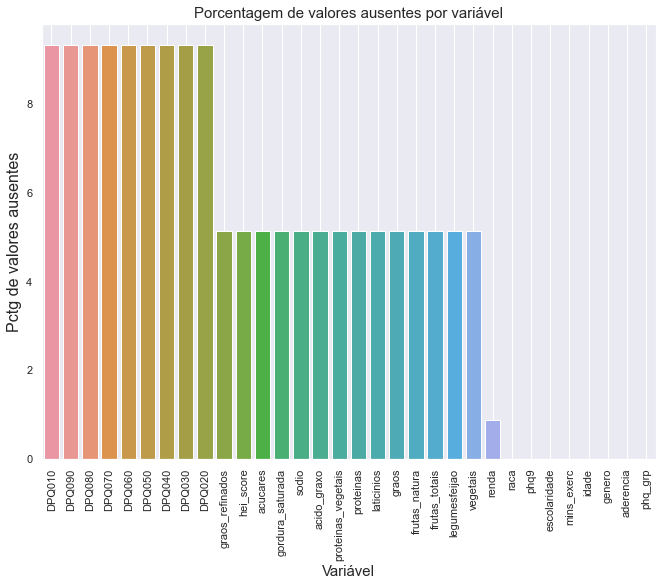

In [2917]:
fig, ax = plt.subplots(figsize = (11,8))
df_null =(df.isnull().sum()/len(df))*100
df_null.sort_values(ascending=False, inplace=True)
sns.barplot(x = df_null.index, y =df_null.values)
plt.grid()
plt.title('Porcentagem de valores ausentes por variável', fontsize = 15)
plt.xlabel(xlabel='Variável', fontsize = 15)
plt.ylabel(ylabel = 'Pctg de valores ausentes', fontsize = 16)
plt.xticks(rotation = '90')
plt.show();

In [2918]:
#Remover as linhas com os valores ausentes me parece o caminho mais fácil já que estes são menos de 10% do df e não devem influenciar tanto no teste de hipóteses
df = df.dropna()
df = df.reset_index(drop=True)

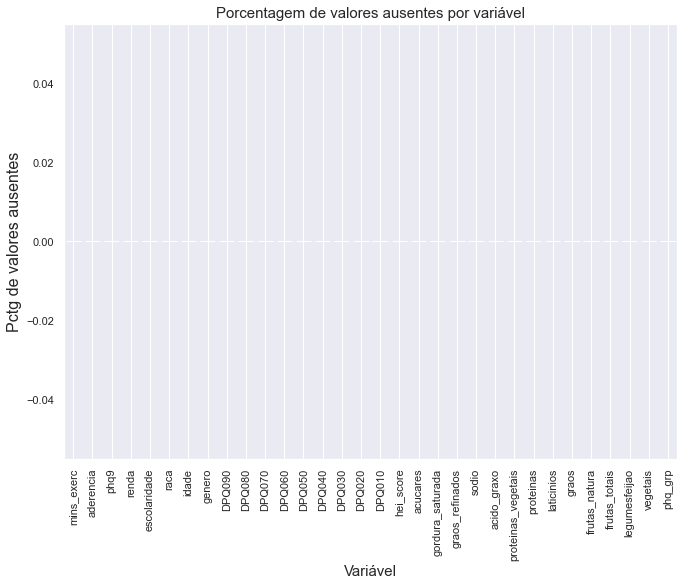

In [2919]:
fig, ax = plt.subplots(figsize = (11,8))
df_null =(df.isnull().sum()/len(df))*100
df_null.sort_values(ascending=False, inplace=True)
sns.barplot(x = df_null.index, y =df_null.values)
plt.grid()
plt.title('Porcentagem de valores ausentes por variável', fontsize = 15)
plt.xlabel(xlabel='Variável', fontsize = 15)
plt.ylabel(ylabel = 'Pctg de valores ausentes', fontsize = 16)
plt.xticks(rotation = '90')
plt.show();

<AxesSubplot:>

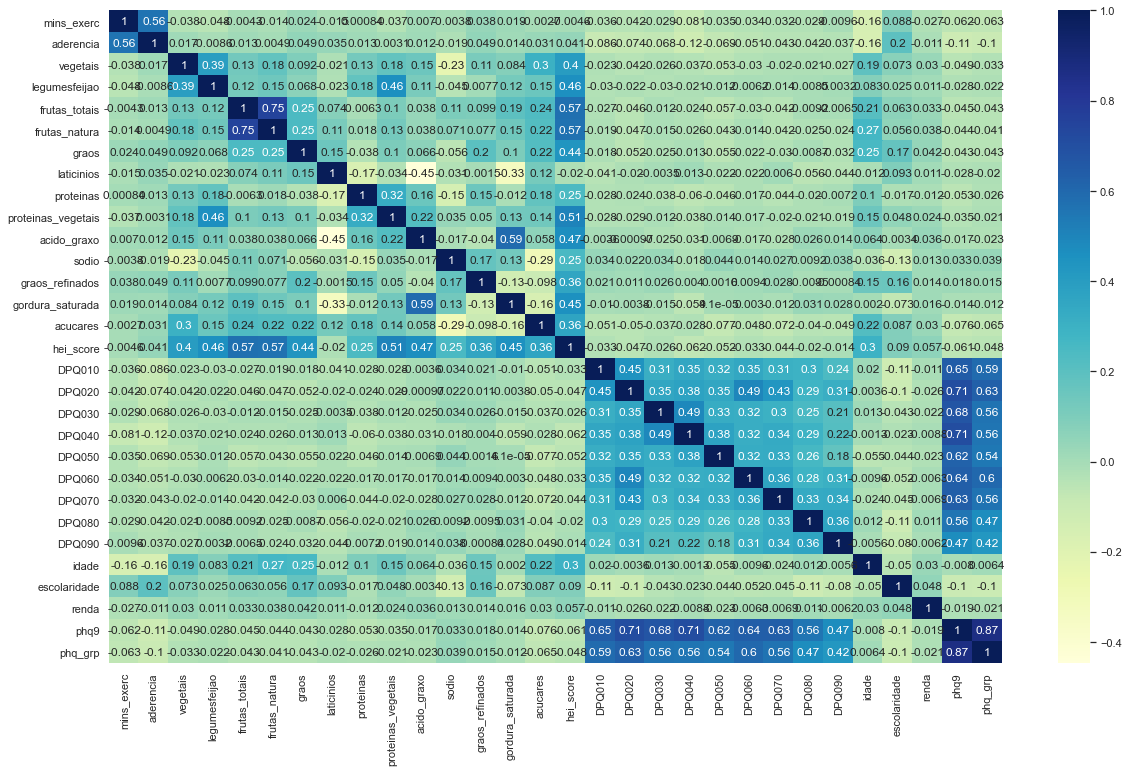

In [2920]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

- mins_exerc

In [2921]:
df.mins_exerc.describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: mins_exerc, dtype: float64

mu = 484.9442510336617
sigma = 796.1000426925766


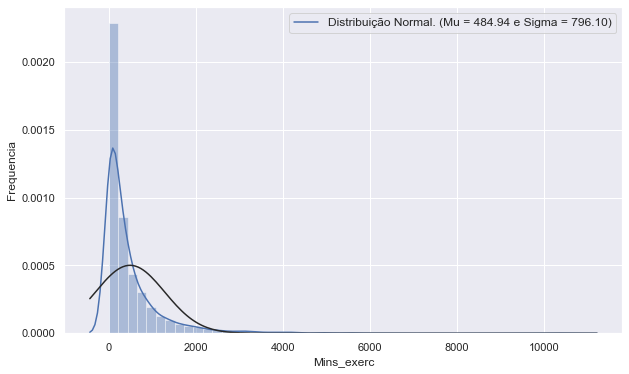

In [2922]:
dist = sns.distplot(df.mins_exerc, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.mins_exerc)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal. (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Mins_exerc');

In [2923]:
#Aparentemente temos outliers que estão corrompendo a análise, por exemplo o valor max é de 10777 minutos de exercicio na semana sendo que são 10080 na semana.
#por isso vamos eliminar todos valores acima do quartil 95
df = df[df.mins_exerc < np.percentile(df.mins_exerc,95) ].reset_index(drop=True)

In [2924]:
df.mins_exerc.describe()

count    4465.000000
mean      346.520194
std       404.877529
min         0.000000
25%        40.000000
50%       205.773672
75%       491.916859
max      1866.050808
Name: mins_exerc, dtype: float64

mu = 346.5201937574515
sigma = 404.83218723387404


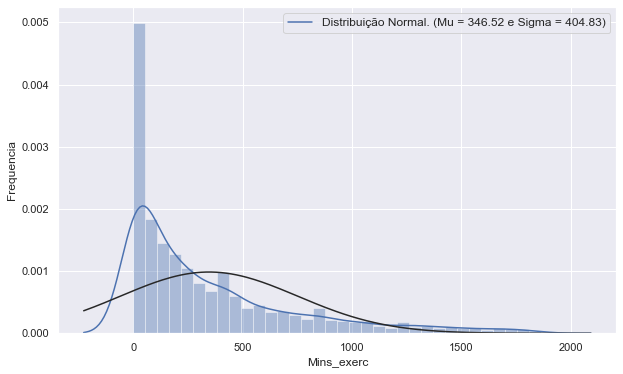

In [2925]:
dist = sns.distplot(df.mins_exerc, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.mins_exerc)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal. (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Mins_exerc');

Se parece com uma distribuição normal que está assimétrica à direita, vamos então aplicar o log pra corrigir essa assimetria e depois normalizar (subtrair a média e dividir pelo desvio padrão) todos valores da coluna.

In [2926]:
df.mins_exerc = np.log1p(df.mins_exerc);
df.mins_exerc = (df.mins_exerc - df.mins_exerc.mean()) / df.mins_exerc.std()

mu = -7.061267086789484e-15
sigma = 0.9998880116464437


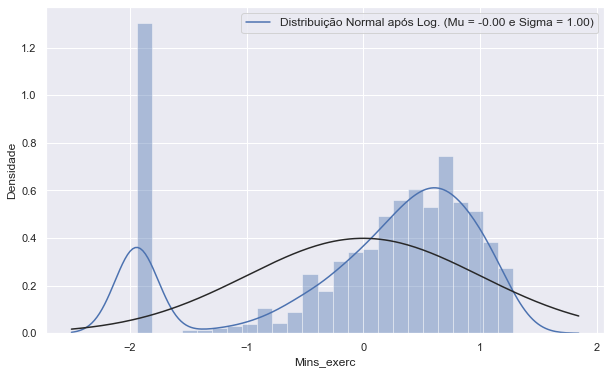

In [2927]:
dist = sns.distplot(df.mins_exerc, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.mins_exerc)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal após Log. (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Mins_exerc');

- Aderencia

In [2928]:
#não temos valores faltando nessa variável
df.aderencia.describe()

count    4465.000000
mean        1.952520
std         0.912372
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: aderencia, dtype: float64

<AxesSubplot:xlabel='count', ylabel='aderencia'>

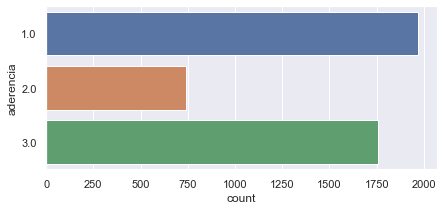

In [2929]:
# 1 = Baixo, 2 = Adequado, 3 = Acima (aderencia a atividades físicas)
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='aderencia', data = df)

Portanto, vemos que a maioria das pessoas ou está acima do adequado ou abaixo em relação ao nível de atividade física.

- Vegetais

mu = 3.217367108553795
sigma = 1.4597851905032713


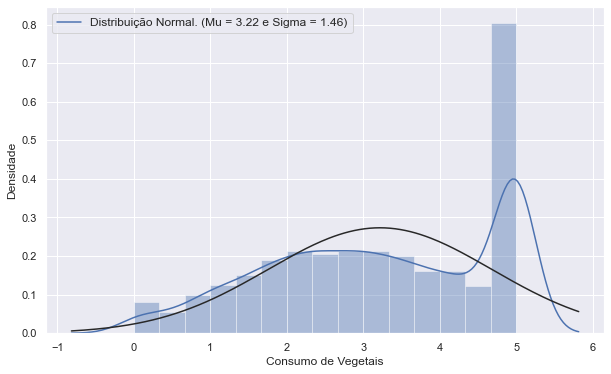

In [2930]:
dist = sns.distplot(df.vegetais, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.vegetais)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal. (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Vegetais');

- legumesfeijao         

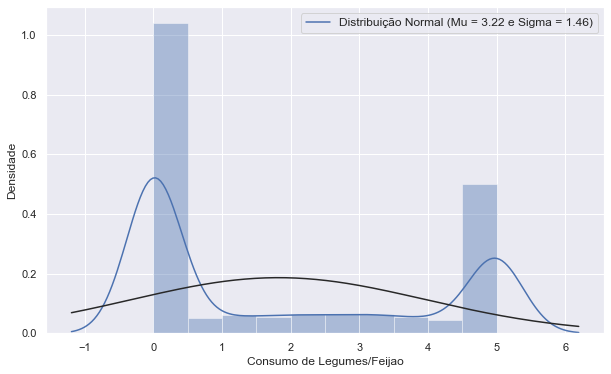

In [2931]:
dist = sns.distplot(df.legumesfeijao, fit = norm)
dist.figure.set_size_inches(10,6)

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Legumes/Feijao');

- frutas_totais       

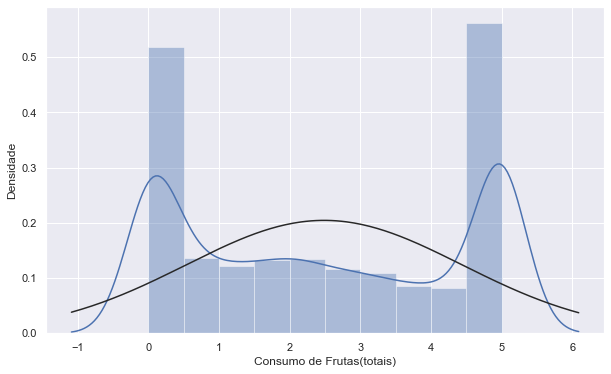

In [2932]:
dist = sns.distplot(df.frutas_totais, fit = norm)
dist.figure.set_size_inches(10,6)

plt.ylabel('Densidade')
plt.xlabel('Consumo de Frutas(totais)');

- frutas_natura      

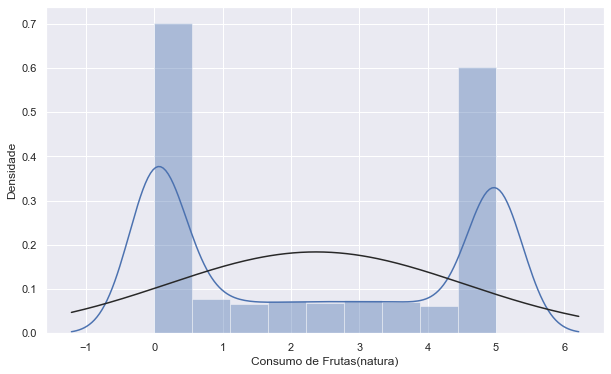

In [2933]:
dist = sns.distplot(df.frutas_natura, fit = norm)
dist.figure.set_size_inches(10,6)

plt.ylabel('Densidade')
plt.xlabel('Consumo de Frutas(natura)');

- graos           

mu = 1.770212025615208
sigma = 1.9130680767252577


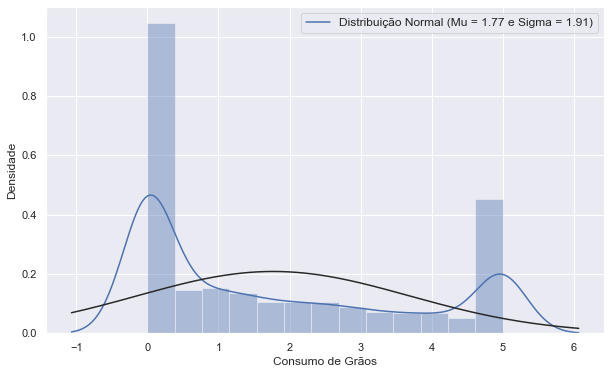

In [2934]:
dist = sns.distplot(df.graos, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.graos)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Grãos');

- laticinios            

mu = 3.776617046301311
sigma = 1.5917301729093198


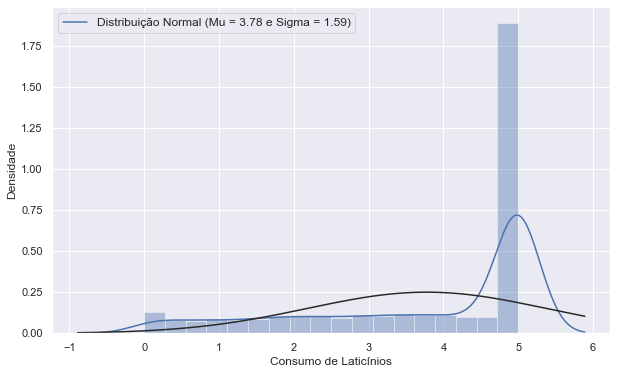

In [2935]:
dist = sns.distplot(df.laticinios, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.laticinios)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Laticínios');

- proteinas           

mu = 4.43869312475247
sigma = 0.9997164036848604


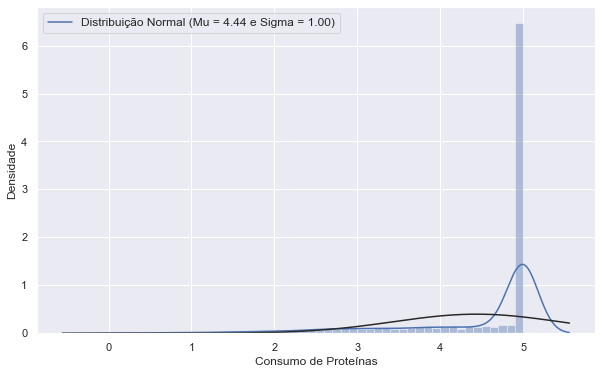

In [2936]:
dist = sns.distplot(df.proteinas, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.proteinas)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Proteínas');

- proteinas_vegetais           

mu = 2.608560108074712
sigma = 2.1648927820616715


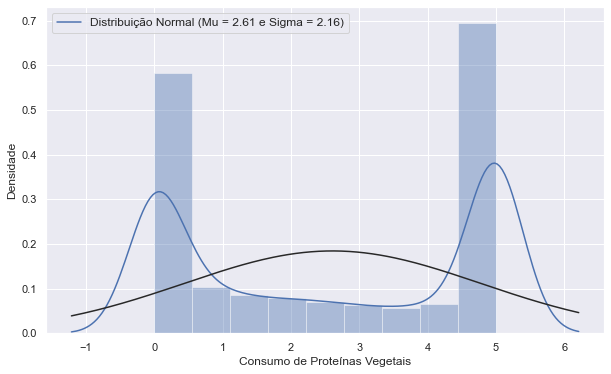

In [2937]:
dist = sns.distplot(df.proteinas_vegetais, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.proteinas_vegetais)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Proteínas Vegetais');

- acido_graxo           

mu = 4.71182397967141
sigma = 3.2381267436190524


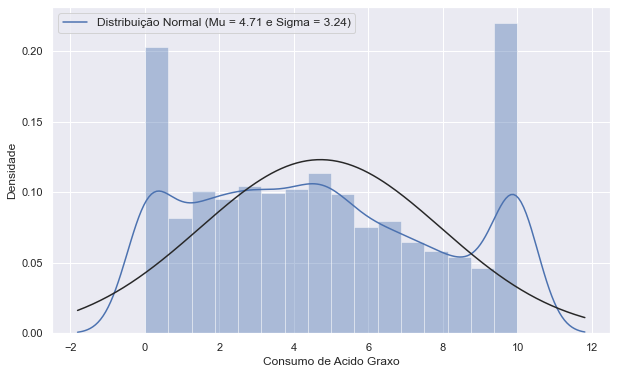

In [2938]:
dist = sns.distplot(df.acido_graxo, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.acido_graxo)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Acido Graxo');

- sodio                

mu = 4.732745450600055
sigma = 3.411087626560125


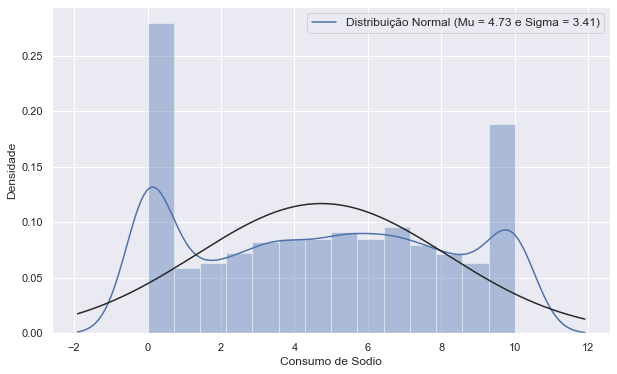

In [2939]:
dist = sns.distplot(df.sodio, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.sodio)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('Consumo de Sodio');

- graos_refinados           

mu = 5.801344155769627
sigma = 3.4838104873011204


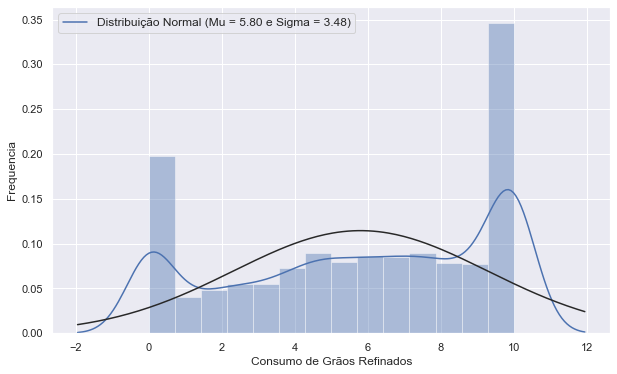

In [2940]:
dist = sns.distplot(df.graos_refinados, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.graos_refinados)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Consumo de Grãos Refinados');

- gordura_saturada           

mu = 6.028422832932424
sigma = 3.1730222831717487


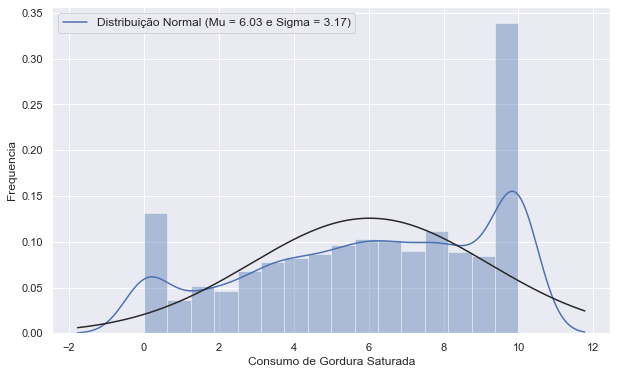

In [2941]:
dist = sns.distplot(df.gordura_saturada, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.gordura_saturada)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Consumo de Gordura Saturada');

- acucares           

mu = 6.216114451623795
sigma = 3.3310116650234294


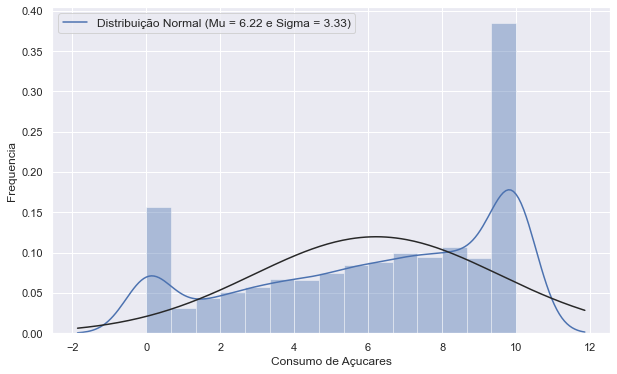

In [2942]:
dist = sns.distplot(df.acucares, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.acucares)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Consumo de Açucares');

- hei_score           

mu = 49.976295275310804
sigma = 12.324930956439408


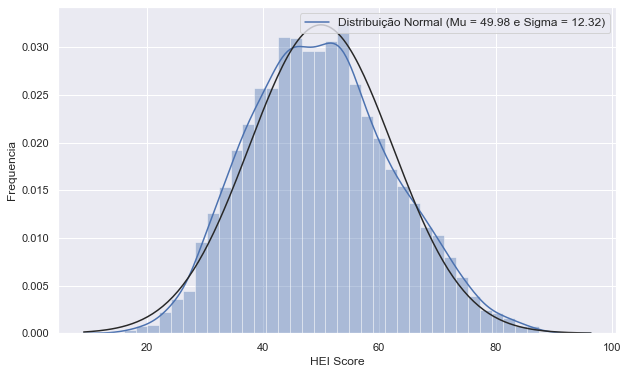

In [2943]:
dist = sns.distplot(df.hei_score, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.hei_score)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('HEI Score');

- DPQ010 - Pouco interesse ou pouco prazer em fazer as coisas nas 2 últimas semanas
  

In [2944]:
df.DPQ010.describe()

count    4465.000000
mean        0.306831
std         0.755156
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ010, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ010'>

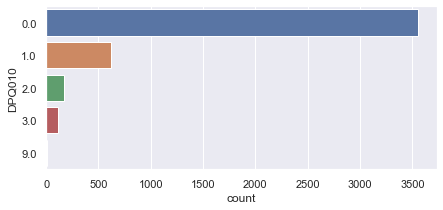

In [2945]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ010', data = df)

- DPQ020 - Se sentiu para baixo, deprimido(a) ou sem perspectiva nas 2 últimas semanas
  

In [2946]:
df.DPQ020.describe()

count    4465.000000
mean        0.311982
std         0.713479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ020, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ020'>

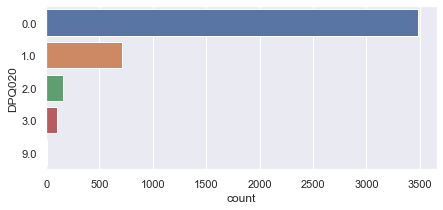

In [2947]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ020', data = df)

- DPQ030 - Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o
costume nas 2 últimas semanas
  

In [2948]:
df.DPQ030.describe()

count    4465.000000
mean        0.544009
std         0.920155
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: DPQ030, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ030'>

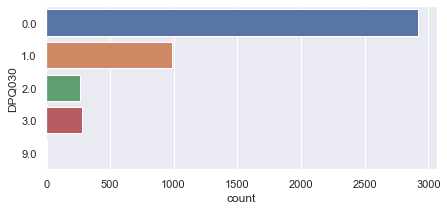

In [2949]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ030', data = df)

- DPQ040 - Se sentiu cansado(a) ou com pouca energia
  

In [2950]:
df.DPQ040.describe()

count    4465.000000
mean        0.720717
std         0.915167
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: DPQ040, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ040'>

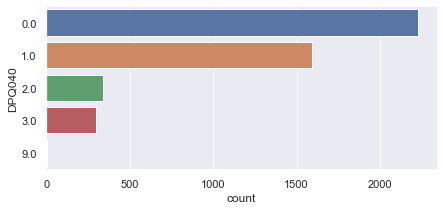

In [2951]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ040', data = df)

- DPQ050 - Falta de apetite ou comeu demais nas 2 últimas semanas

In [2952]:
df.DPQ050.describe()

count    4465.000000
mean        0.317581
std         0.733185
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ050, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ050'>

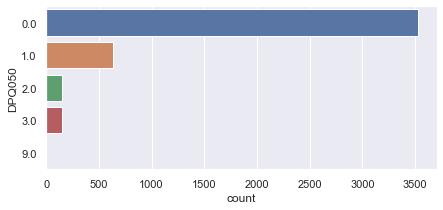

In [2953]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ050', data = df)

- DPQ060 - Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou
sua família ou a você mesmo(a) nas 2 últimas semanas

In [2954]:
df.DPQ060.describe()

count    4465.000000
mean        0.209406
std         0.615511
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ060, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ060'>

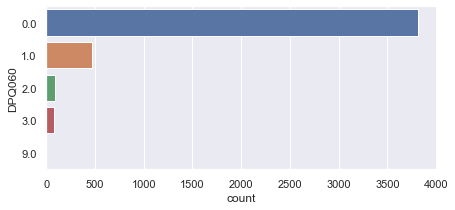

In [2955]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ060', data = df)

- DPQ070 - Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão) nas 2 últimas semanas

In [2956]:
df.DPQ070.describe()

count    4465.000000
mean        0.225980
std         0.619462
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ070, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ070'>

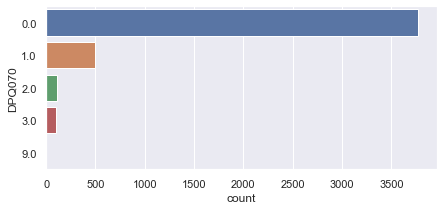

In [2957]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ070', data = df)

- DPQ080 - Teve lentidão para se movimentar ou falar (a ponto de outras pessoas
perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de
um lado para o outro mais do que costumenas 2 últimas semanas

In [2958]:
df.DPQ080.describe()

count    4465.000000
mean        0.148488
std         0.599535
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ080, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ080'>

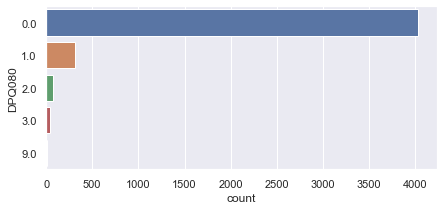

In [2959]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ080', data = df)

- DPQ090 - Pensou em se ferir de alguma maneira ou que seria melhor estar morto(a) nas 2 últimas semanas

In [2960]:
df.DPQ090.describe()

count    4465.000000
mean        0.049720
std         0.328923
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: DPQ090, dtype: float64

<AxesSubplot:xlabel='count', ylabel='DPQ090'>

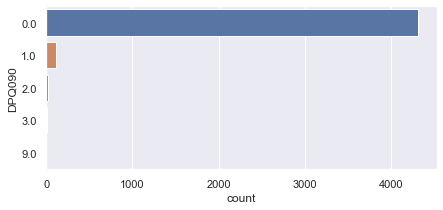

In [2961]:
#0 - nenhuma vez, 1 - menos de uma semana, 2 - uma semana ou mais, 3 - quase todos dias, 7 - se recusou a responder, 9 - não sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='DPQ090', data = df)

In [2962]:
#Aplicando a moda para as pessoas que não souberam responder as perguntas
df.loc[df.DPQ010 == 9, 'DPQ010'] = df.DPQ010.mode()
df.loc[df.DPQ020 == 9, 'DPQ010'] = df.DPQ020.mode()
df.loc[df.DPQ030 == 9, 'DPQ010'] = df.DPQ030.mode()
df.loc[df.DPQ040 == 9, 'DPQ010'] = df.DPQ040.mode()
df.loc[df.DPQ050 == 9, 'DPQ010'] = df.DPQ050.mode()
df.loc[df.DPQ060 == 9, 'DPQ010'] = df.DPQ060.mode()
df.loc[df.DPQ070 == 9, 'DPQ010'] = df.DPQ070.mode()
df.loc[df.DPQ080 == 9, 'DPQ010'] = df.DPQ080.mode()
df.loc[df.DPQ090 == 9, 'DPQ010'] = df.DPQ090.mode()

- Genero

In [2963]:
df.genero.describe()

count     4465
unique       2
top          2
freq      2356
Name: genero, dtype: int64

<AxesSubplot:xlabel='count', ylabel='genero'>

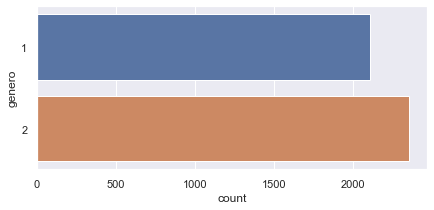

In [2964]:
# 1 = homem, 2 = mulher
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='genero', data = df)

- Idade

In [2965]:
df.idade.describe()

count    4465.000000
mean       45.395969
std        19.791192
min        18.000000
25%        28.000000
50%        43.000000
75%        62.000000
max        85.000000
Name: idade, dtype: float64

mu = 45.3959686450168
sigma = 19.788975900102276


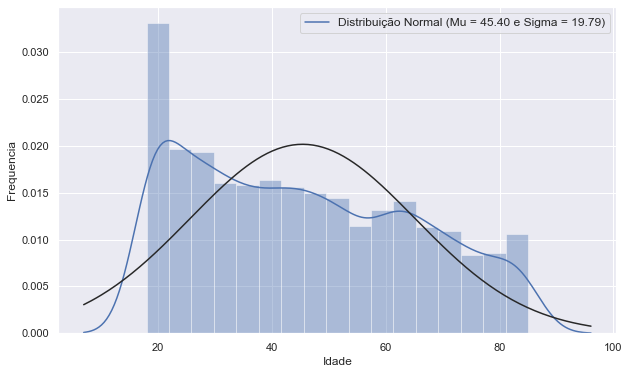

In [2966]:
dist = sns.distplot(df.idade, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.idade)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Frequencia')
plt.xlabel('Idade');

- Raça

In [2967]:
df.raca.describe()

count     4465
unique       5
top          3
freq      2173
Name: raca, dtype: int64

<AxesSubplot:xlabel='count', ylabel='raca'>

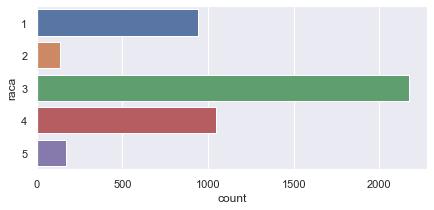

In [2968]:
# 1 = Branco, 2 = Negro, 3 - Mexicano-Americano, 4 - Outro, 5 - Outros Hispânicos (não mexicanos)
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='raca', data = df)

- Escolaridade

In [2969]:
df.escolaridade.describe()

count    4465.000000
mean        3.268757
std         1.251298
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: escolaridade, dtype: float64

<AxesSubplot:xlabel='count', ylabel='escolaridade'>

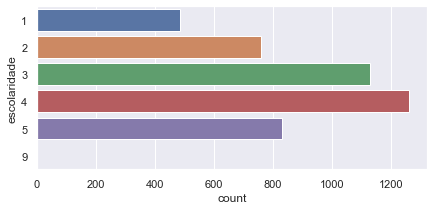

In [2970]:
# 1 = Menor que 9o ano, 2 = Ensino Médio Incompleto, 3 - Ensino Médio Completo, 4 - Superior Incompleto, 5 - Superior Completo ou Maior, 7 - Se Recusou a Responder , 9 - Não Sabe
fig,ax = plt.subplots(figsize=(7,3))
sns.countplot(y='escolaridade', data = df)

In [2971]:
df.loc[df.escolaridade == 9, 'escolaridade'] = df.escolaridade.mode()
df.loc[df.escolaridade == 7, 'escolaridade'] = df.escolaridade.mode()

- renda

In [2972]:
df.renda.describe()

count    4465.000000
mean        8.473236
std        11.565954
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        99.000000
Name: renda, dtype: float64

<AxesSubplot:xlabel='count', ylabel='renda'>

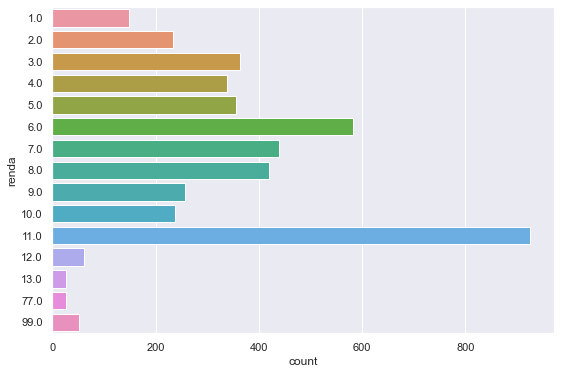

In [2973]:
# 1: < 4999, 2: < 9999, 3: < 14999, 4: < 19999, 5: <24999, 6: < 34999, 7: < 44999, 8: < 54999, 9: < 64999, 10:<74999, 11: > 75000, 12: >20000, 13: < 20000, 77: Se recusou, 99: Não sabe    
fig,ax = plt.subplots(figsize=(9,6))
sns.countplot(y='renda', data = df)

In [2974]:
#para os que menos de 20000 aplicamos a moda dos menores que 20k, que é 3. Já pra os maiores que 20k aplicamos a moda geral que é 11, assim como para os que se recuseram e não souberam responder
df.loc[df.renda == 12, 'renda'] = 11
df.loc[df.renda == 13, 'renda'] = 3
df.loc[df.renda == 77, 'renda'] = 11
df.loc[df.renda == 99, 'renda'] = 11

- phq9

mu = 2.83471444568869
sigma = 3.991649156973457


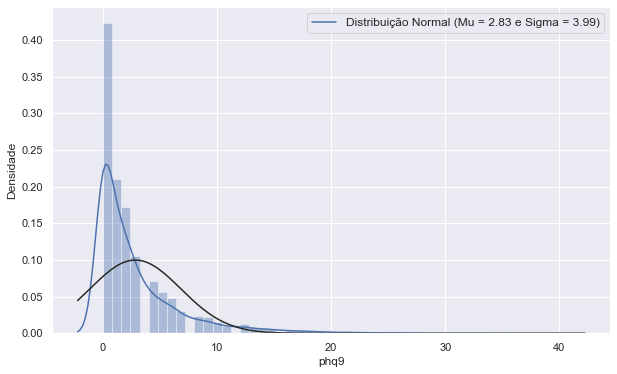

In [2975]:
dist = sns.distplot(df.phq9, fit = norm)
dist.figure.set_size_inches(10,6)

(mu,sigma) = norm.fit(df.phq9)
print(f'mu = {mu}')
print(f'sigma = {sigma}')

plt.legend([f'Distribuição Normal (Mu = {mu:.2f} e Sigma = {sigma:.2f})'], loc = 'best', fontsize = 12)
plt.ylabel('Densidade')
plt.xlabel('phq9');

In [2976]:
df.phq9.describe()

count    4465.000000
mean        2.834714
std         3.992096
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        40.000000
Name: phq9, dtype: float64

- phq9_grp

In [2977]:
df.phq_grp.describe()

count    4465.000000
mean        0.297200
std         0.799952
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: phq_grp, dtype: float64

<AxesSubplot:xlabel='count', ylabel='phq_grp'>

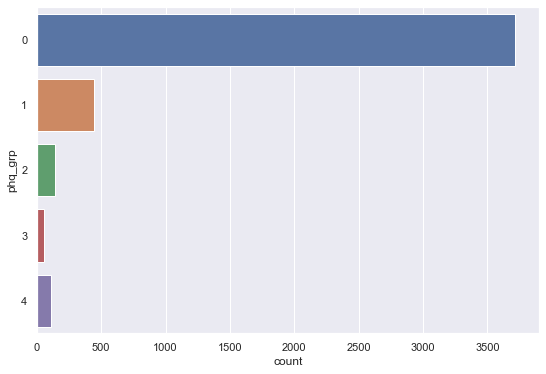

In [2978]:
#0: Sem sintomas, 1: sintomas leves, 2: sintomas moderados, 3: sintomas moderadamente, 4:sintomas severos
fig,ax = plt.subplots(figsize=(9,6))
sns.countplot(y='phq_grp', data = df)

## 4) Análise Bivariada

### 4.0) Heatmap

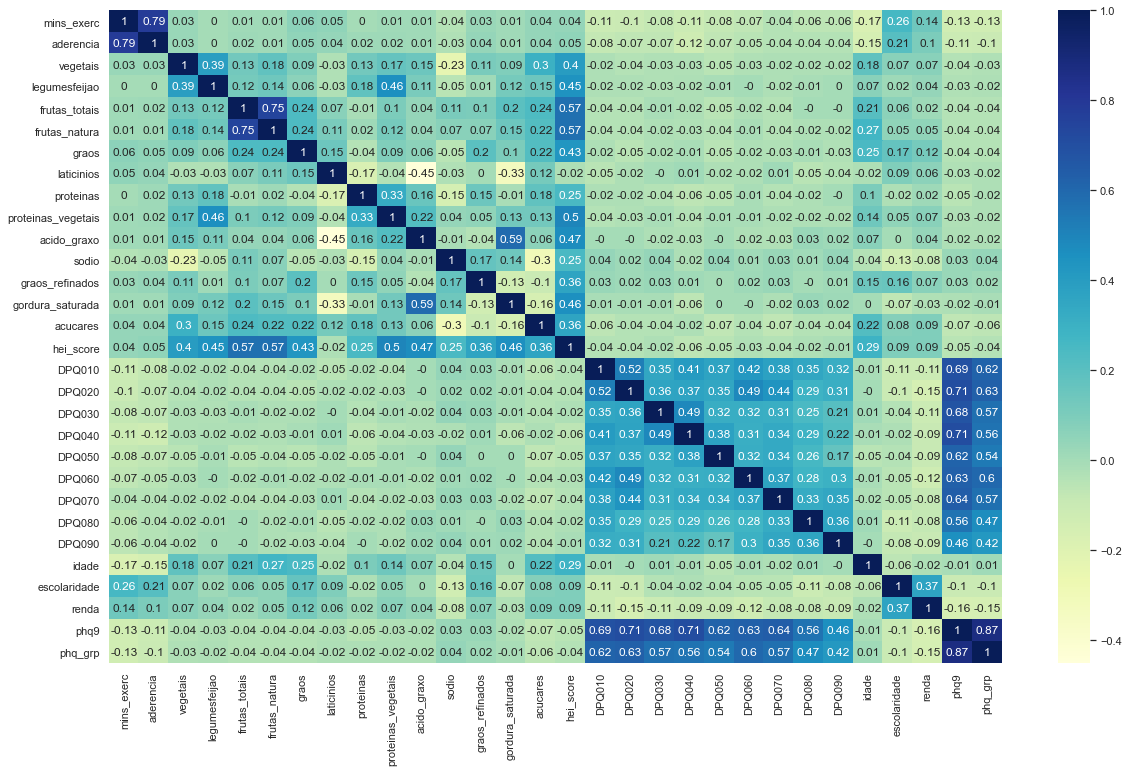

In [2979]:
#Heatmap
corr = df.corr().round(2)
fig,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot = True, cmap="YlGnBu");

### 4.1) Sintomas de depressão vs Características Demográficas

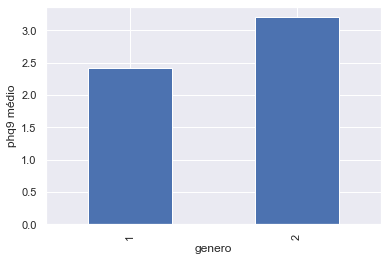

In [2980]:
#1 homem, 2 mulher. Mulheres parecem ser mais propensas a depressão que homens já que o phq normalizado médio é bem superior dos homens. Ou seriam elas mais sinceras nas respostas ??
df.groupby('genero')['phq9'].mean().plot(kind='bar');
plt.ylabel(ylabel = 'phq9 médio');

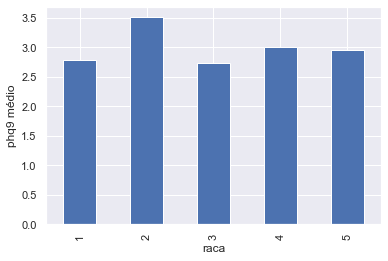

In [2981]:
#Pessoas negras (2) parecem ter a maior propensão a sintomas de depressão enquanto pessoas brancas (1) e hispanicas (3) o menor
df.groupby('raca')['phq9'].mean().plot(kind='bar');
plt.ylabel(ylabel = 'phq9 médio');

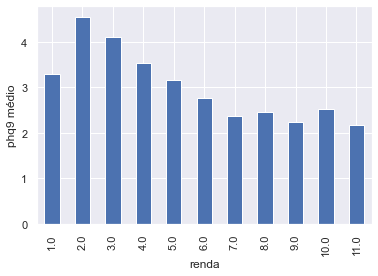

In [2982]:
#Aparenta ter uma clara relação entre as faixas de renda e o indice phq9 normalizado, sugerindo que pessoas mais pobres tendem a ter mais sintomas de depressão 
df.groupby('renda')['phq9'].mean().plot(kind='bar')
plt.ylabel(ylabel = 'phq9 médio');

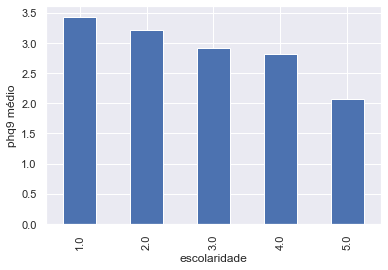

In [2983]:
#E o mesmo vale para a escolaridade, pessoas com mais educação aparantemente desenvolvem menos sintomas de depressão do que a média e pessoas com menos educação mais do que a média
df.groupby('escolaridade')['phq9'].mean().plot(kind='bar');
plt.ylabel(ylabel = 'phq9 médio');

### 4.2) Hábitos Saudáveis vs Características Demográficas

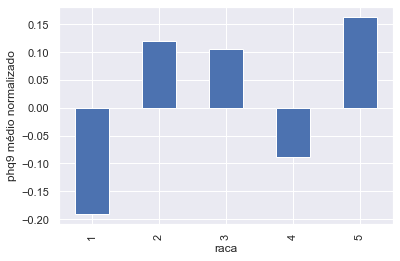

In [2984]:
#Pessoas brancas se exercitam consideravelmente abaixo da média enquanto negros, hispânicos e mexicano-americanos se exercitam em geral acima da média
df.groupby('raca')['mins_exerc'].mean().plot(kind='bar');
plt.ylabel(ylabel = 'phq9 médio normalizado');

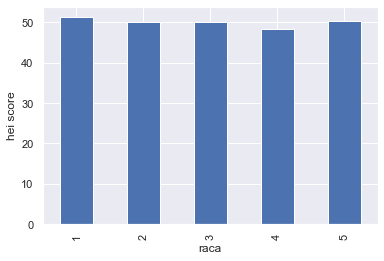

In [2985]:
#Pessoas brancas tem uma qualidade da alimentação média superior e os hispânicos aparentemente tem a pior
df.groupby('raca')['hei_score'].mean().plot(kind='bar')
plt.ylabel(ylabel='hei score');

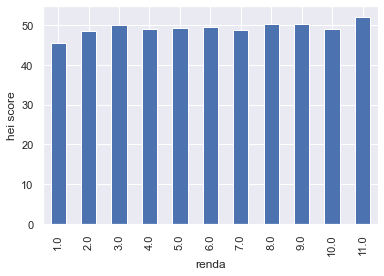

In [2986]:
#Somente as pessoas com renda mais alta tem uma qualidade da alimentação consideravelmente acima da média, todas as outras faixas estão próximas exceta pela de renda mais baixa que está muito abaixo da média no indíce hei
df.groupby('renda')['hei_score'].mean().plot(kind='bar');
plt.ylabel(ylabel='hei score');

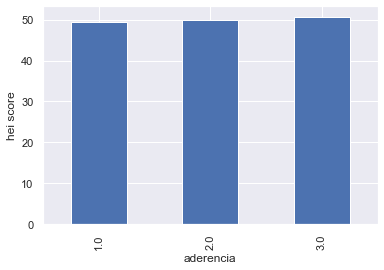

In [2987]:
#Aparentemente não tem correlação entre o nível de atividade física e o hei_score (qualidade da alimentação)
df.groupby('aderencia')['hei_score'].mean().plot(kind='bar');
plt.ylabel(ylabel='hei score');

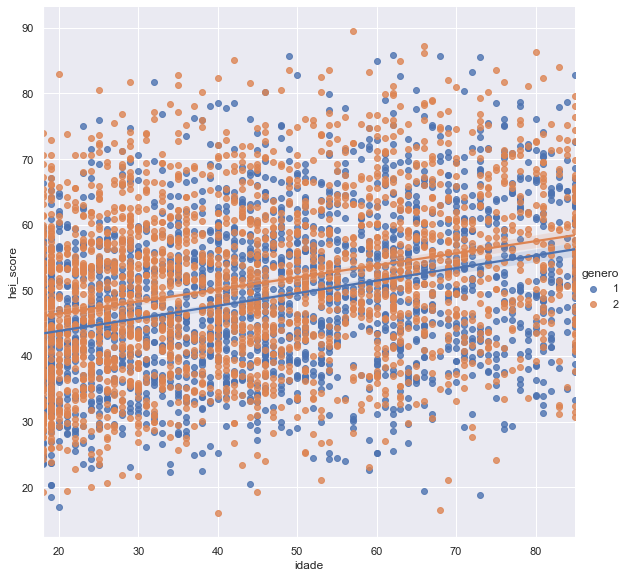

In [2988]:
#Tanto mulheres quanto homens melhoram a alimentação com o aumento da idade, porém mulheres se alimentam melhor em geral
sns.lmplot(data = df, x = 'idade', y = 'hei_score',height= 8, hue ='genero');

### 4.3) Sintomas de depressão vs Hábitos Saudáveis

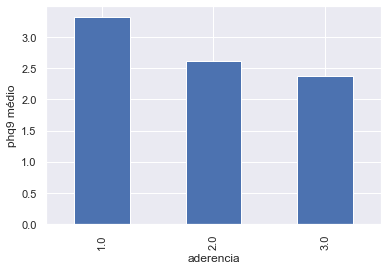

In [2989]:
#Aparenta ter uma clara relação entre a aderencia a atividades físicas e o indice phq9 normalizado, sugerindo que quem faz menos atividades físicas tende a ter mais sintomas de depressão
df.groupby('aderencia')['phq9'].mean().plot(kind='bar');
plt.ylabel(ylabel='phq9 médio');

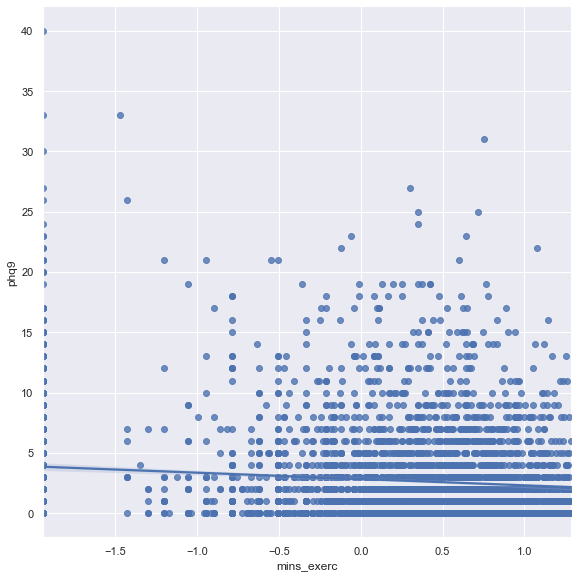

In [2990]:
#verificando a relação de phq9 com mins_exerc vemos que as pessoas que ficam abaixo da média em minutos de exercício ficam acima da média no índice phq9, indicando uma possível correlação negativa
sns.lmplot(data = df, x = 'mins_exerc', y = 'phq9' ,height= 8);

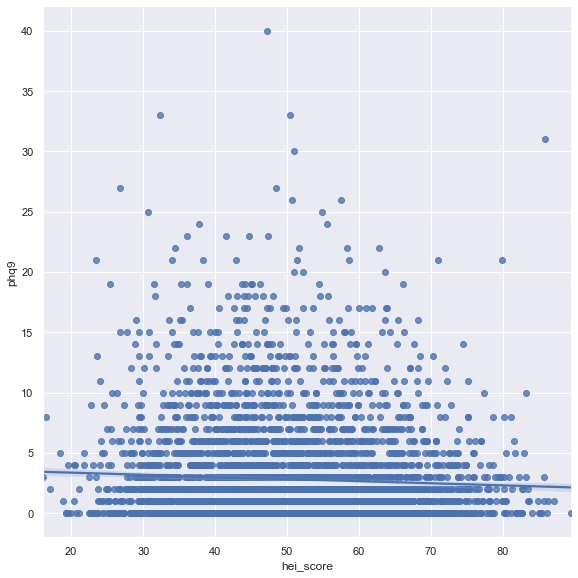

In [2991]:
#Aparentemente também temos uma relação de correlação negativa entre o hei_score e o índice phq9
sns.lmplot(data = df, x = 'hei_score', y = 'phq9' ,height= 8);

## 5) Teste de Hipóteses

Hipoteses:

1) Há diferença estatística entre os índices de sintomas psicológicos entre homens e mulheres
2) Há diferença estatística entre os índices de sintomas psicológicos em negros em relação a brancos e mexicano-americanos
3) Há diferença estatística significativa entre os grupos mais e menos escolarizados na população quanto a presença de sintomas de depressão
4) Há diferença estatística entre os índices de sintomas psicológicos entre pessoas que se exercitam e que não se exercitam
5) Há diferença estatística entre nos índices de qualidade da alimentação em pessoas com sintomas de depressão severo e sem sintomas

### 5.1) Teste de Hipóteses - Características Demográficas vs Sintomas de Depressão

Aqui vamos testar as hipóteses 1,2 e 3 que estão relacionadas a características demográficas.

#### 5.1.1) Há diferença estatística entre os índices de sintomas psicológicos entre homens e mulheres

In [2992]:
df_phq9 = pd.DataFrame(df.groupby('genero')['phq9'].mean())
df_phq9

,phq9
genero,
1,2.421053
2,3.205008


<AxesSubplot:>

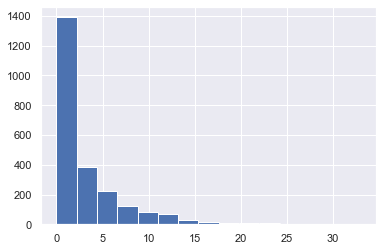

In [2993]:
df[df.genero == 2]['phq9'].hist(bins = 15)

In [2994]:
x = df[df.genero == 2]['phq9']
mu = np.mean(x)
sigma = np.std(x)
mu,sigma

(3.205008488964346, 4.097909364897667)

In [2995]:
# Cálculo da densidade de probabilidade para dois desvios-padrão
st.norm(mu, sigma).pdf(2*sigma/(len(x)**0.5))

0.07398560227956798

In [2996]:
# cálculo do intervalo de confiança para 95% de nível de confiança
st.norm.interval(alpha=0.95,loc=mu,scale=sigma)

(-4.826746278144489, 11.23676325607318)

<AxesSubplot:>

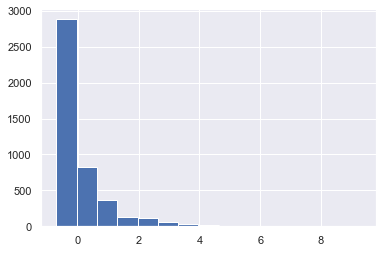

In [2997]:
#precisamos normalizar os valores de phq9
#df['phq9_norm'] = np.log1p(df['phq9'])
df['phq9_norm'] = (df['phq9'] - df['phq9'].mean())/df['phq9'].std()
df['phq9_norm'].hist(bins=15)

In [2998]:
df[['genero','phq9','phq9_norm']]

,genero,phq9,phq9_norm
0,2,0.0,-0.710082
1,1,0.0,-0.710082
2,1,0.0,-0.710082
3,2,4.0,0.291898
4,1,0.0,-0.710082
...,...,...,...
4460,2,2.0,-0.209092
4461,2,10.0,1.794868
4462,1,2.0,-0.209092
4463,1,0.0,-0.710082


In [2999]:
st.ttest_ind(a=df.phq9_norm[df.genero == 1],
                b=df.phq9_norm[df.genero == 2], 
                equal_var = False)

Ttest_indResult(statistic=-6.60682779304331, pvalue=4.3876154013251644e-11)

-   h0: Não há diferença estatistíca significativa entre o índice phq9 para homens e mulheres
-   h1: Há diferença estatistíca significativa entre o índice phq9 para homens e mulheres

Como pvalue é menor que 0.05 rejeitamos h0 e aceitamos h1.

#### 5.1.2) Há diferença estatística entre os índices de sintomas psicológicos em negros em relação a brancos e mexicano-americanos

In [3000]:
df_phq9 = pd.DataFrame(df.groupby('raca')['phq9'].mean())
df_phq9

,phq9
raca,
1,2.775424
2,3.511278
3,2.732628
4,2.996169
5,2.947368


<AxesSubplot:>

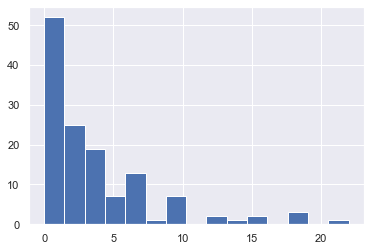

In [3001]:
df[df.raca == 2]['phq9'].hist(bins = 15)

In [3002]:
x = df[df.raca == 2]['phq9']
mu = np.mean(x)
sigma = np.std(x)
mu,sigma

(3.511278195488722, 4.398592634378498)

In [3003]:
# Cálculo da densidade de probabilidade para dois desvios-padrão
st.norm(mu, sigma).pdf(2*sigma/(len(x)**0.5))

0.07461284347578294

In [3004]:
# cálculo do intervalo de confiança para 95% de nível de confiança
st.norm.interval(alpha=0.95,loc=mu,scale=sigma)

(-5.109804950556293, 12.132361341533738)

In [3005]:
# Cálculo da densidade de probabilidade para dois desvios-padrão
st.norm(mu, sigma).pdf(2*sigma/(len(x)**0.5))

0.07461284347578294

In [3006]:
# cálculo do intervalo de confiança para 95% de nível de confiança
st.norm.interval(alpha=0.95,loc=mu,scale=sigma)

(-5.109804950556293, 12.132361341533738)

In [3007]:
#t_test individual
st.ttest_ind(a=df.phq9_norm[df.raca == 2], #negros
                b=df.phq9_norm[df.raca == 3],  #mexicano-americanos
                equal_var = False)

Ttest_indResult(statistic=1.9882194299171314, pvalue=0.048676342531770264)

-   h0: Não há diferença estatistíca significativa entre o índice phq9 para negros e mexicano-americanos
-   h1: Há diferença estatistíca significativa entre o índice phq9 para negros e mexicano-americanos

Como pvalue (0.048) é menor que 0.05 rejeitamos h0 e aceitamos h1.

In [3008]:
#t_test individual
st.ttest_ind(a=df.phq9_norm[df.raca == 2], #negros
                b=df.phq9_norm[df.raca == 1],  #brancos
                equal_var = False)

Ttest_indResult(statistic=1.8272996601094327, pvalue=0.06950254390198587)

-   h0: Não há diferença estatistíca significativa entre o índice phq9 para negros e brancos
-   h1: Há diferença estatistíca significativa entre o índice phq9 para negros e brancos

Como pvalue (0.069) é maior que 0.05 aceitamos h0 e rejeitamos h1.

#### 5.1.3) Há diferença estatística significativa entre os grupos mais e menos escolarizados na população quanto a presença de sintomas de depressão

In [3009]:
df_phq9 = pd.DataFrame(df.groupby('escolaridade')['phq9'].mean())
df_phq9

,phq9
escolaridade,
1.0,3.429752
2.0,3.216074
3.0,2.920354
4.0,2.808882
5.0,2.063855


<AxesSubplot:>

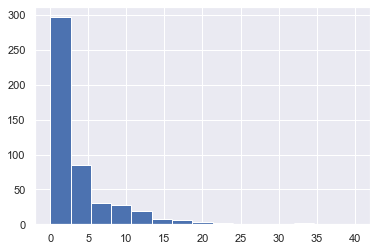

In [3010]:
df[df.escolaridade == 1]['phq9'].hist(bins = 15)

In [3011]:
x = df[df.escolaridade == 1]['phq9']
mu = np.mean(x)
sigma = np.std(x)
mu,sigma

(3.4297520661157024, 5.183136110361072)

In [3012]:
# Cálculo da densidade de probabilidade para dois desvios-padrão
st.norm(mu, sigma).pdf(2*sigma/(len(x)**0.5))

0.0653983812680914

In [3013]:
# cálculo do intervalo de confiança para 95% de nível de confiança
st.norm.interval(alpha=0.95,loc=mu,scale=sigma)

(-6.729008037161021, 13.588512169392425)

### 5.2) Teste de Hipóteses - Hábitos Saudáveis vs Sintomas de Depressão

Aqui vamos testar as hipóteses 4 e 5 que estão relacionadas a hábitos saudáveis

#### 5.2.1) Há diferença estatística entre os índices de sintomas psicológicos entre pessoas que se exercitam e que não se exercitam

In [3014]:
df_phq9 = pd.DataFrame(df.groupby('aderencia')['phq9'].mean())
df_phq9

,phq9
aderencia,
1.0,3.328593
2.0,2.622463
3.0,2.370518


In [3015]:
#t_test individual
st.ttest_ind(a=df.phq9_norm[df.aderencia == 1], #abaixo da meta de atividade física
                b=df.phq9_norm[df.aderencia == 3],  #acima da meta de atividade física
                equal_var = False)

Ttest_indResult(statistic=7.409324329073003, pvalue=1.5753584052779691e-13)

-   h0: Não há diferença estatistíca significativa entre o índice phq9 para pessoas que se exercitam acima e abaixo da meta.
-   h1: Há diferença estatistíca significativa entre o índice phq9 para pessoas que se exercitam acima e abaixo da meta.

Como pvalue (1.57e-13) é menor que 0.05 rejeitamos h0 e aceitamos h1.

#### 5.2.2) Há diferença estatística entre nos índices de qualidade da alimentação em pessoas com sintomas de depressão severo e sem sintomas

In [3016]:
df_phq9 = pd.DataFrame(df.groupby('phq_grp')['hei_score'].mean())
df_phq9

,hei_score
phq_grp,
0,50.198764
1,49.268995
2,48.832426
3,47.530342
4,47.978825


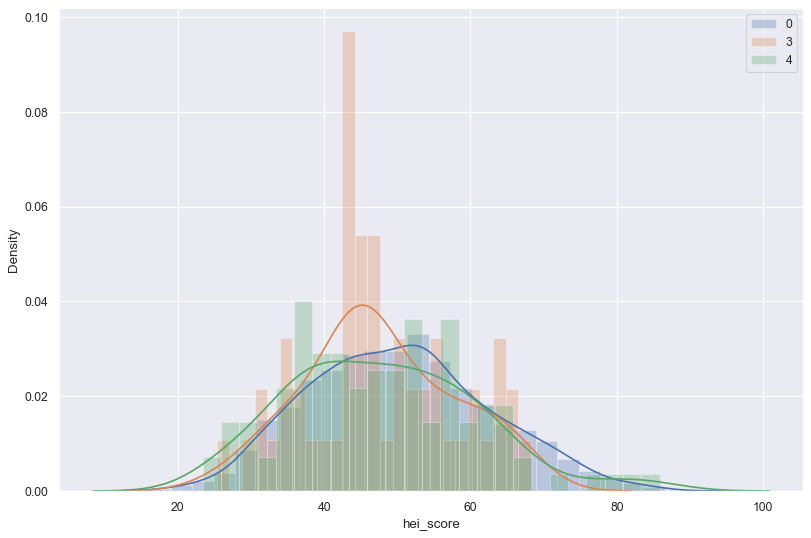

In [3032]:
bins = 25
groups = [0,3,4]

from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

for g in groups:
    ax = sns.distplot(df[df['phq_grp'] == g]['hei_score'], label=g, kde=True,hist_kws={'alpha': 0.3}, bins = bins)

plt.legend(loc='upper right')
plt.show()

In [ ]:
x = df[df.phq_grp == 1]['hei_score']
mu = np.mean(x)
sigma = np.std(x)
mu,sigma

(49.14496611112552, 11.786237390362325)

In [ ]:
# Cálculo da densidade de probabilidade para dois desvios-padrão
st.norm(mu, sigma).pdf(2*sigma/(len(x)**0.5))

8.207617755896809e-06

In [ ]:
# cálculo do intervalo de confiança para 95% de nível de confiança
st.norm.interval(alpha=0.95,loc=mu,scale=sigma)

(26.04436531277601, 72.24556690947503)

In [3037]:
st.ttest_ind(a=df.hei_score[df.phq_grp == 0], #sem sintomas de depressão
                b=df.hei_score[df.phq_grp == 4],  #depressão severa
                equal_var = False)

Ttest_indResult(statistic=1.7925174643546642, pvalue=0.07567550927579864)

-   h0: Não há diferença estatistíca significativa entre o hei_score de pessoas sem sintomas de depressão e pressoas com depressão severa
-   h1: Há diferença estatistíca significativa entre o índice phq9 para pessoas que se exercitam acima e abaixo da meta.

Como pvalue (0.075) é maior que 0.05 aceitamos h0 e reijetamos h1.

## 6) Aspectos da Análise

### 6.1) É um estudo experimental observacional pois nós não intervimos nos dados. (ex: usamos os grupos originais)

### 6.2) Um dos possíveis vieses é o de resposta já que usualmente mulheres são mais abertas com os seus sentimentos do que os homens então é natural que sejam mais sinceras no questionário enquanto os homens tendem a reprimir seus sentimentos por exemplo.

### 6.3) Nós aceitamos a hipótese que há diferença estatística significativa entre pessoas que se exercitam e pessoas que não se exercitam, porém não conseguimos provar que há diferença estatística significativa na qualidade de alimentação de pessoas que tem sintomas de depressão severa e pessoas sem sintoma de depressão

### 6.4) Nós dependemos da amostragem complexa que foi assumida como uma premissa para fazer a inferência em relação a população. Também poderíamos realizar outros testes de hipóteses. Outro ponto é que poderíamos construir um modelo de ML para prever os sintomas de depressão de uma pessoa dadas as características demográficas, índice de qualidade de alimentação e níveis de atividade física.

### 6.5) Condições e motivações no ambiente de trabalho (ex: pessoas que trabalham num ambiente de trabalho sadio tem menos depressão do que pessoas que trabalham em empresas com ambiente de trabalho abusivo), localização geográfica da pessoa (uma hipótese: pessoas que moram em lugares com neve tem mais depressão do que pessoas que moram na praia), consumo de alcool e drogas, composição familiar. São somente algumas das outras variáveis que poderíamos relacionar com o índice de depressão para enriquecer esta análise e assumir outras hipóteses.